# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing "for" loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

feature_data_bow = []
feature_data_tfidf = []
data = pd.read_csv('preprocessed_data.csv',nrows=100000) # Taking 100k rows as laptop spec - 8GB RAM

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [2]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
X = pd.DataFrame(data.drop("project_is_approved",axis=1))
Y = data["project_is_approved"].values # instead od converting into DF, using array of arr/list of lists(2D) as BoW and TFIDF will check for list instances
# As we have seen in the TFTDF assignment

X_train,x_test,Y_train,y_test = train_test_split(X,Y,random_state=15,test_size=0.33,stratify=Y)
# On using stratify parameter, the data will be split on the same proportion of class labels
# so if Y is having classes--0&1 in the ratio 1:2 then the splitted datasets also will have class label ratio as 1:2
X_train.shape[0]+x_test.shape[0] # checking the size after splitting into train and test data sets

100000

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [3]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer

## BOW technique for set 1 ##
## essay
vectorizer = CountVectorizer(min_df=10,max_features=5000,ngram_range=(1,4))
# Here it is correct because we are fitting on train data only and for test data we are using that fitted model only
# As we are not again using fit and transform on the test data
X_train_essay_bow = vectorizer.fit_transform(X_train["essay"].values)
x_test_essay_bow = vectorizer.transform(x_test["essay"].values)

print("After vectorization using 'BOW' for feature: essay")
print(X_train_essay_bow.shape, Y_train.shape)
print(x_test_essay_bow.shape, y_test.shape)
print("-"*100)
feature_data_bow.extend(vectorizer.get_feature_names())

## TFIDF technique for set 2 ##
## essay
tfidfvectorizer = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1,4))
# Here it is correct because we are fitting on train data only and for test data we are using that fitted model only
# As we are not again using fit and transform on the test data
X_train_essay_tfidf = tfidfvectorizer.fit_transform(X_train["essay"].values)
x_test_essay_tfidf = tfidfvectorizer.transform(x_test["essay"].values)

print("After vectorization using 'TFIDF' for feature: essay")
print(X_train_essay_tfidf.shape, Y_train.shape)
print(x_test_essay_tfidf.shape, y_test.shape)
print("-"*100)
feature_data_tfidf.extend(vectorizer.get_feature_names())

After vectorization using 'BOW' for feature: essay
(67000, 5000) (67000,)
(33000, 5000) (33000,)
----------------------------------------------------------------------------------------------------
After vectorization using 'TFIDF' for feature: essay
(67000, 5000) (67000,)
(33000, 5000) (33000,)
----------------------------------------------------------------------------------------------------


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [4]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# instead of converting into DF for all categorical data in train dataset while fitting 
# we are using array of arr/list of lists because BoW and TFIDF will check for list instances
# As we have seen in the TFTDF assignment
# later we can do horizantal stacking to see as a dataframe view

## We are using BOW here as the one hot encoding technique

print("*"*45,"Categorical features","*"*45)
# Teacher_prefix
vectorizer = CountVectorizer()# initiating vectorizer
vectorizer.fit(X_train["teacher_prefix"].values) # preparing dictionary(vocalubary) for all unique values

X_train_teacher_ohe = vectorizer.transform(X_train["teacher_prefix"].values)
x_test_teacher_ohe = vectorizer.transform(x_test["teacher_prefix"].values)

print("After vectorizations of categorical feature: teacher_prefix")
print(X_train_teacher_ohe.shape, Y_train.shape)
print(x_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
feature_data_bow.extend(vectorizer.get_feature_names())
feature_data_tfidf.extend(vectorizer.get_feature_names())

# project_grade_category
vectorizer = CountVectorizer()# initiating vectorizer
vectorizer.fit(X_train["project_grade_category"].values) # preparing dictionary(vocalubary) for all unique values

X_train_prj_grade_ohe = vectorizer.transform(X_train["project_grade_category"].values)
x_test_prj_grade_ohe = vectorizer.transform(x_test["project_grade_category"].values)

print("After vectorizations of categorical feature: project_grade_category")
print(X_train_prj_grade_ohe.shape, Y_train.shape)
print(x_test_prj_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
feature_data_bow.extend(vectorizer.get_feature_names())
feature_data_tfidf.extend(vectorizer.get_feature_names())

# school_state
vectorizer = CountVectorizer()# initiating vectorizer
vectorizer.fit(X_train["school_state"].values) # preparing dictionary(vocalubary) for all unique values

X_train_school_st_ohe = vectorizer.transform(X_train["school_state"].values)
x_test_school_st_ohe = vectorizer.transform(x_test["school_state"].values)

print("After vectorizations of categorical feature: school_state")
print(X_train_school_st_ohe.shape, Y_train.shape)
print(x_test_school_st_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
feature_data_bow.extend(vectorizer.get_feature_names())
feature_data_tfidf.extend(vectorizer.get_feature_names())

# clean_categories
vectorizer = CountVectorizer()# initiating vectorizer
vectorizer.fit(X_train["clean_categories"].values) # preparing dictionary(vocalubary) for all unique values

X_train_cl_categories_ohe = vectorizer.transform(X_train["clean_categories"].values)
x_test_cl_categories_ohe = vectorizer.transform(x_test["clean_categories"].values)

print("After vectorizations of categorical feature: clean_categories")
print(X_train_cl_categories_ohe.shape, Y_train.shape)
print(x_test_cl_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
feature_data_bow.extend(vectorizer.get_feature_names())
feature_data_tfidf.extend(vectorizer.get_feature_names())

# clean_sub_categories
vectorizer = CountVectorizer()# initiating vectorizer
vectorizer.fit(X_train["clean_subcategories"].values) # preparing dictionary(vocalubary) for all unique values

X_train_cl_subcategories_ohe = vectorizer.transform(X_train["clean_subcategories"].values)
x_test_cl_subcategories_ohe = vectorizer.transform(x_test["clean_subcategories"].values)

print("After vectorizations of categorical feature: clean_subcategories")
print(X_train_cl_subcategories_ohe.shape, Y_train.shape)
print(x_test_cl_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
feature_data_bow.extend(vectorizer.get_feature_names())
feature_data_tfidf.extend(vectorizer.get_feature_names())

print("*"*45,"Numerical features","*"*45)
# Price
nm = Normalizer()
# nm.fit(X_train["price"].values)-> will give 1D array but 2D array is expected by the fit method as we seen in TFIDF assign
nm.fit(X_train["price"].values.reshape(1,-1)) # forming a row vector

X_train_price_nrmlz = nm.transform(X_train["price"].values.reshape(1,-1))
x_test_price_nrmlz = nm.transform(x_test["price"].values.reshape(1,-1))

X_train_price_nrmlz = X_train_price_nrmlz.reshape(-1,1)
x_test_price_nrmlz = x_test_price_nrmlz.reshape(-1,1)

print("After vectorizations of Numerical feature: price")
print(X_train_price_nrmlz.shape, Y_train.shape)
print(x_test_price_nrmlz.shape, y_test.shape)
print("="*100)

# Number of projects previously done by teacher
nm = Normalizer()
# nm.fit(X_train["price"].values)-> will give 1D array but 2D array is expected by the fit method as we seen in TFIDF assign
nm.fit(X_train["teacher_number_of_previously_posted_projects"].values.reshape(1,-1)) # forming a row vector

X_train_num_proj_teacher_nrmlz = nm.transform(X_train["teacher_number_of_previously_posted_projects"].values.reshape(1,-1))
x_test_num_proj_teacher_nrmlz = nm.transform(x_test["teacher_number_of_previously_posted_projects"].values.reshape(1,-1))

# Reshaping because while doing horizantal stacking row count should be same to put correctly
X_train_num_proj_teacher_nrmlz = X_train_num_proj_teacher_nrmlz.reshape(-1,1)
x_test_num_proj_teacher_nrmlz = x_test_num_proj_teacher_nrmlz.reshape(-1,1)

print("After vectorizations of Numerical feature: teacher_number_of_previously_posted_projects")
print(X_train_num_proj_teacher_nrmlz.shape, Y_train.shape)
print(x_test_num_proj_teacher_nrmlz.shape, y_test.shape)
print("="*100)

********************************************* Categorical features *********************************************
After vectorizations of categorical feature: teacher_prefix
(67000, 5) (67000,)
(33000, 5) (33000,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
After vectorizations of categorical feature: project_grade_category
(67000, 4) (67000,)
(33000, 4) (33000,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
After vectorizations of categorical feature: school_state
(67000, 51) (67000,)
(33000, 51) (33000,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
After vectorizations of categorical feature: clean_categories
(67000, 9) (67000,)
(33000, 9) (33000,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'l

In [5]:
feature_data_bow.append("price")
feature_data_bow.append("teacher_number_of_previously_posted_projects")

In [6]:
print(len(feature_data_bow))
#feature_data_bow

5101


In [7]:
feature_data_tfidf.append("price")
feature_data_tfidf.append("teacher_number_of_previously_posted_projects")

In [8]:
print(len(feature_data_tfidf))
#feature_data_tfidf

5101


**Some important findings in normalization process:**

In [9]:
X_train["teacher_number_of_previously_posted_projects"].values # will cause error in normalization

array([ 0,  1,  0, ...,  4, 24,  7])

In [10]:
X_train["teacher_number_of_previously_posted_projects"].values.reshape(1,-1) # 2D array will be sent to normalization
# this is a row vector

array([[ 0,  1,  0, ...,  4, 24,  7]])

In [11]:
# this also will return 2D array but this is a column vector and on normalising each row value turns into 1
# as there will be only 1 element in each row there wont be effect of normalization
X_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1) 

array([[ 0],
       [ 1],
       [ 0],
       ...,
       [ 4],
       [24],
       [ 7]])

In [12]:
from scipy.sparse import hstack

X_tr_bow = hstack((X_train_essay_bow,X_train_teacher_ohe,X_train_prj_grade_ohe,X_train_school_st_ohe,X_train_cl_categories_ohe,X_train_cl_subcategories_ohe,X_train_price_nrmlz,X_train_num_proj_teacher_nrmlz)).tocsr()
x_te_bow = hstack((x_test_essay_bow,x_test_teacher_ohe,x_test_prj_grade_ohe,x_test_school_st_ohe,x_test_cl_categories_ohe,x_test_cl_subcategories_ohe,x_test_price_nrmlz,x_test_num_proj_teacher_nrmlz)).tocsr()

print("Final Data matrix for set1:")
print(X_tr_bow.shape, Y_train.shape)
print(x_te_bow.shape, y_test.shape)
print("="*100)

X_tr_tfidf = hstack((X_train_essay_tfidf,X_train_teacher_ohe,X_train_prj_grade_ohe,X_train_school_st_ohe,X_train_cl_categories_ohe,X_train_cl_subcategories_ohe,X_train_price_nrmlz,X_train_num_proj_teacher_nrmlz)).tocsr()
x_te_tfidf = hstack((x_test_essay_tfidf,x_test_teacher_ohe,x_test_prj_grade_ohe,x_test_school_st_ohe,x_test_cl_categories_ohe,x_test_cl_subcategories_ohe,x_test_price_nrmlz,x_test_num_proj_teacher_nrmlz)).tocsr()

print("Final Data matrix for set2:")
print(X_tr_tfidf.shape, Y_train.shape)
print(x_te_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix for set1:
(67000, 5101) (67000,)
(33000, 5101) (33000,)
Final Data matrix for set2:
(67000, 5101) (67000,)
(33000, 5101) (33000,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<h3> BOW Featurization </h3>
<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.030844,0.005417,0.017029,0.000262,1e-05,{'alpha': 1e-05},0.690581,0.687687,0.682537,0.686935,0.003327,7,0.721600,0.724177,0.725555,0.723777,0.001639
2,0.023175,0.000082,0.016962,0.000059,0.0001,{'alpha': 0.0001},0.690620,0.687687,0.682537,0.686948,0.003341,6,0.721594,0.724177,0.725555,0.723775,0.001642
1,0.023523,0.000645,0.016871,0.000023,0.0005,{'alpha': 0.0005},0.690646,0.687687,0.682536,0.686956,0.003351,4,0.721589,0.724177,0.725555,0.723773,0.001644
4,0.023517,0.000411,0.016974,0.000083,0.001,{'alpha': 0.001},0.690657,0.687687,0.682536,0.686960,0.003355,3,0.721586,0.724176,0.725555,0.723772,0.001645
3,0.023226,0.000045,0.016950,0.000019,0.005,{'alpha': 0.005},0.690678,0.687684,0.682534,0.686965,0.003364,2,0.721576,0.724173,0.725552,0.723767,0.001649


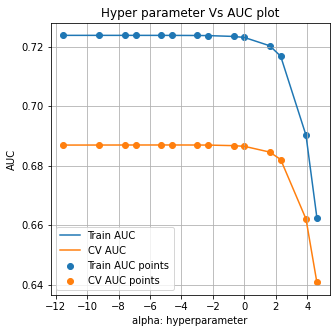

In [13]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import numpy as np

#Create a GaussianNB Classifier
model = MultinomialNB()
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
# Train score is not getting returned by default, like in the reference notebook
# So referred stack over flow suggestion here: 
# https://stackoverflow.com/questions/57136676/sklearn-model-selection-gridsearchcv-is-throwing-keyerror-mean-train-score
clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc',return_train_score=True)
## Using Grid search as we have defined the parameters explicitly
clf.fit(X_tr_bow, Y_train)

results = pd.DataFrame.from_dict(clf.cv_results_) # forming a Dataframe from cross validation results dictionary
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
alpha =  results['param_alpha']
log_alpha = np.log(list(alpha))

# plotting the points
# on a single plot we are directly plotting normally and also the scatter plot for more visibility
plt.figure(figsize=(5,5)) ## giving figure size for more readability of the graph
plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')
plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
results.head()

In [14]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1]) # probablity prediction for ROC curve
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

0.015857162340513375


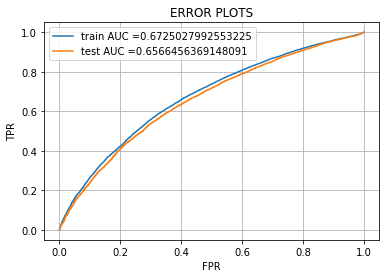

In [15]:
best_alpha = 100 # As the distance b/w Train and CV curves is low at alpha = 100

from sklearn.metrics import roc_curve, auc

nb_model = MultinomialNB(alpha=best_alpha)
nb_model.fit(X_tr_bow, Y_train)

## actuallt nb_model.predict should be used but as we took AUC as performance metric here
## we need to calculate probability values, for every data point

y_train_pred = batch_predict(nb_model, X_tr_bow)    
y_test_pred = batch_predict(nb_model, x_te_bow)

model_features_bow = nb_model.feature_log_prob_

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
## ROC curve is nothing but the curve drawn between the FPR and TPR values at evry threshold
## threshold can be obtained easily by sorting the y_pred in descending order
## THen select the top value as the threshold and less than that would be zero
## so when we keep going like this, at every stage we will receive 3 params, those are FPR, TPR and threshold
## Refer 5th Assignment and class notes for ROC
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
print(auc(train_fpr, train_tpr)-auc(test_fpr, test_tpr))

In [16]:
def best_threshold_calc(thre,tpr,fpr):
    ind = np.argmax(tpr*(1-fpr)) ## taking Positive class as high priority
    threshold = thre[np.argmax(tpr*(1-fpr))]
    print("The maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(threshold,3))
    return threshold

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

print("="*100)
from sklearn.metrics import confusion_matrix
best_t = best_threshold_calc(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

The maximum value of tpr*(1-fpr) 0.1374068134186176 for threshold 1.0
Train confusion matrix
[[ 6367  3806]
 [20871 35956]]
Test confusion matrix
[[ 3013  1997]
 [10251 17739]]


<h3>TFIDF Featurisation</h3>

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.027888,0.006199,0.018699,0.002509,1e-05,{'alpha': 1e-05},0.667130,0.672925,0.658509,0.666188,0.005923,1,0.704292,0.710251,0.704223,0.706256,0.002826
2,0.023844,0.000740,0.017145,0.000049,0.0001,{'alpha': 0.0001},0.667129,0.672924,0.658508,0.666187,0.005923,2,0.704292,0.710251,0.704222,0.706255,0.002826
1,0.023323,0.000039,0.017120,0.000045,0.0005,{'alpha': 0.0005},0.667126,0.672922,0.658506,0.666184,0.005923,3,0.704288,0.710247,0.704218,0.706251,0.002826
4,0.023450,0.000153,0.017140,0.000035,0.001,{'alpha': 0.001},0.667122,0.672918,0.658501,0.666180,0.005923,4,0.704284,0.710242,0.704213,0.706246,0.002826
3,0.023323,0.000074,0.017136,0.000051,0.005,{'alpha': 0.005},0.667097,0.672891,0.658473,0.666153,0.005924,5,0.704247,0.710203,0.704174,0.706208,0.002825


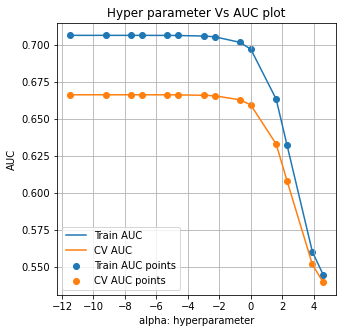

In [17]:
model = MultinomialNB()
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
# Train score is not getting returned by default, like in the reference notebook
# So referred stack over flow suggestion here: 
# https://stackoverflow.com/questions/57136676/sklearn-model-selection-gridsearchcv-is-throwing-keyerror-mean-train-score
clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc',return_train_score=True)
## Using Grid search as we have defined the parameters explicitly
clf.fit(X_tr_tfidf, Y_train)

results = pd.DataFrame.from_dict(clf.cv_results_) # forming a Dataframe from cross validation results dictionary
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
alpha =  results['param_alpha']
log_alpha = np.log(list(alpha))

# plotting the points
# on a single plot we are directly plotting normally and also the scatter plot for more visibility
plt.figure(figsize=(5,5)) ## giving figure size for more readability of the graph
plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')
plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
results.head()

0.010157755830947912


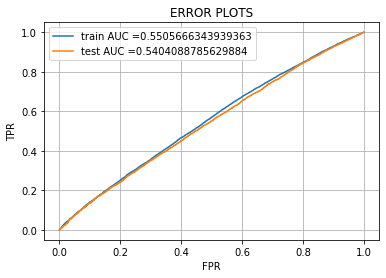

In [18]:
# best_alpha here it could be 50 or 100, as the distance between TRAIN and test almost the same
best_alpha = 100 # As the distance b/w Train and CV curves is low at alpha = 100

from sklearn.metrics import roc_curve, auc

nb_model = MultinomialNB(alpha=best_alpha)
nb_model.fit(X_tr_tfidf, Y_train)

## actuallt nb_model.predict should be used but as we took AUC as performance metric here
## we need to calculate probability values, for every data point

y_train_pred = batch_predict(nb_model, X_tr_tfidf)    
y_test_pred = batch_predict(nb_model, x_te_tfidf)

model_features_tfidf = nb_model.feature_log_prob_

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
## ROC curve is nothing but the curve drawn between the FPR and TPR values at evry threshold
## threshold can be obtained easily by sorting the y_pred in descending order
## THen select the top value as the threshold and less than that would be zero
## so when we keep going like this, at every stage we will receive 3 params, those are FPR, TPR and threshold
## Refer 5th Assignment and class notes for ROC
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
print(auc(train_fpr, train_tpr)-auc(test_fpr, test_tpr))

In [19]:
def best_threshold_calc(thre,tpr,fpr):
    ind = np.argmax(tpr*(1-fpr)) ## taking Positive class as high priority
    threshold = thre[np.argmax(tpr*(1-fpr))]
    print("The maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(threshold,3))
    return threshold

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

print("="*100)
from sklearn.metrics import confusion_matrix
best_t = best_threshold_calc(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

The maximum value of tpr*(1-fpr) 0.21868791867365353 for threshold 0.999
Train confusion matrix
[[ 5537  4636]
 [27270 29557]]
Test confusion matrix
[[ 2658  2352]
 [13366 14624]]


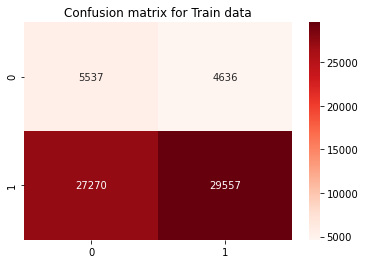

In [20]:
#https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
import seaborn as sns  

cm1 = confusion_matrix(Y_train, predict_with_best_t(y_train_pred, best_t))
sns.heatmap(cm1, annot=True,fmt="d",cmap='Reds')
plt.title("Confusion matrix for Train data")
plt.show()

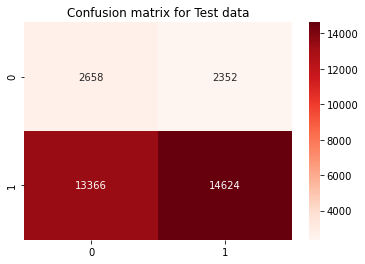

In [21]:
cm2 = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(cm2, annot=True,fmt="d",cmap='Reds')
plt.title("Confusion matrix for Test data")
plt.show()

In [22]:
## getting top features for negative and positive classes based on probability for BoW Featurisation
idx_bow_pos = np.array(list(np.argsort(model_features_bow[1]))[::-1])
idx_bow_neg = np.array(list(np.argsort(model_features_bow[0])))
count=0
top_feats_bow_pos = []
top_feats_bow_neg = []
for i in idx_bow_pos:
    top_feats_bow_pos.append(feature_data_bow[i])
    count+=1
    if count==19: break
count=0
for i in idx_bow_neg:
    top_feats_bow_neg.append(feature_data_bow[i])
    count+=1
    if count==19: break
print(top_feats_bow_pos,"\n",top_feats_bow_neg)

['students', 'school', 'my', 'learning', 'classroom', 'the', 'not', 'they', 'my students', 'learn', 'help', 'many', 'nannan', 'we', 'work', 'need', 'reading', 'use', 'love'] 
 ['dr', 'wy', 'vt', 'teacher_number_of_previously_posted_projects', 'nd', 'the wobble', 'chromebooks allow', 'chairs help', 'subscription', 'the chromebooks', 'chromebooks students', 'de', 'chairs allow', 'these stools', 'ri', 'balance balls', 'mt', 'these chromebooks', 'these chairs']


In [23]:
## getting top features for negative and positive classes based on probability for TFIDF Featurisation
idx_tfidf_pos = np.array(list(np.argsort(model_features_tfidf[1]))[::-1])
idx_tfidf_neg = np.array(list(np.argsort(model_features_tfidf[0])))
count=0
top_feats_tfidf_pos = []
top_feats_tfidf_neg = []
for i in idx_tfidf_pos:
    top_feats_tfidf_pos.append(feature_data_tfidf[i])
    count+=1
    if count==19: break
count=0
for i in idx_tfidf_neg:
    top_feats_tfidf_neg.append(feature_data_tfidf[i])
    count+=1
    if count==19: break
print(top_feats_tfidf_pos,"\n",top_feats_tfidf_neg)

['mrs', 'literacy_language', 'grades_prek_2', 'math_science', 'ms', 'grades_3_5', 'literacy', 'mathematics', 'literature_writing', 'grades_6_8', 'ca', 'health_sports', 'students', 'specialneeds', 'specialneeds', 'appliedlearning', 'grades_9_12', 'health_wellness', 'mr'] 
 ['dr', 'the wobble', 'chromebooks allow', 'chromebooks students', 'chairs help', 'the chromebooks', 'chairs allow', 'balance balls', 'subscription', 'these stools', 'stools allow', 'these chromebooks', 'these chairs', 'core muscles', 'able listen', 'we also use', 'seating option', 'leveled books', 'using ipads']


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [30]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper-parameter", "AUC"]

x.add_row(["BoW","Naive_Bayes",100,0.66])
x.add_row(["TFIDF","Naive_Bayes",100,0.54])
print(x)

+------------+-------------+-----------------+------+
| Vectorizer |    Model    | Hyper-parameter | AUC  |
+------------+-------------+-----------------+------+
|    BoW     | Naive_Bayes |       100       | 0.66 |
|   TFIDF    | Naive_Bayes |       100       | 0.54 |
+------------+-------------+-----------------+------+
